In [103]:
# data set
# A
a=[0,0,1,1,0,0,
   0,1,0,0,1,0,
   1,1,1,1,1,1,
   1,0,0,0,0,1,
   1,0,0,0,0,1]

# B
b=[0,1,1,1,1,0,
   0,1,0,0,1,0,
   1,1,1,1,1,0,
   0,1,0,0,1,0,
   0,1,1,1,1,0]

# C
c=[0,1,1,1,1,0,
   0,1,0,0,0,0,
   0,1,0,0,0,0,
   0,1,0,0,0,0,
   0,1,1,1,1,0]

In [104]:
# create Labels
y=[[1,0,0],
   [0,1,0],
   [0,0,1]]

In [105]:
import numpy as np
import matplotlib.pyplot as plt

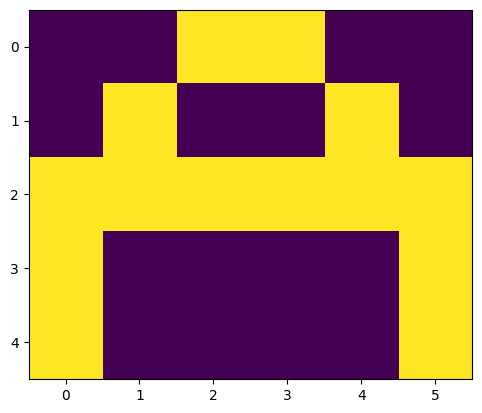

In [106]:
# Visualize the data 
plt.imshow(np.array(a).reshape(5,6))
plt.show()

In [107]:
# convert data and labels into numpy array
x=[np.array(a).reshape(1,30),np.array(b).reshape(1,30),np.array(c).reshape(1,30)]
y=np.array(y)
print(x,'\n\n',y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [108]:
# input (1,30)
# hidden (1,5)
# output (3,3)

In [109]:
# activation Function
def signoid(x):
    return  (1/(1+np.exp(-x)))

In [110]:
# creating feed forward NN
def f_forward(x,w1,w2):
    # hidden layer
    z1=x.dot(w1)
    a1=signoid(z1)

    # output layer
    z2=a1.dot(w2)
    a2=signoid(z2)
    return(a2)

In [111]:
# intialize the weights 
# def generate_wt(x,y):
#     I=[]
#     for i in range(x*y):
#         I.append(np.random.random())
#     return(np.array(I).reshape(x,y))
def generate_wt(x, y):
    return np.random.randn(x, y) * np.sqrt(1. / x)  # Xavier initialization


In [112]:
# for loss we will use mean square methods
def loss(out,Y):
    s=(np.square(out-Y))
    s=np.sum(s)/len(y)
    return(s)
def loss1(predicted, actual):
    return (predicted - actual) ** 2  # Simple MSE loss


In [113]:
# # back propagation of error
# def back_prop(x,y,w1,w2,alpha):

#     # hiden
#     z1=x.dot(w1)
#     a1=signoid(z1)

#     # output layer
#     z2=a1.dot(w2)
#     a2=signoid(z2)

#     d2=(a2-y)
#     d1=np.multiply((w2.dot((d2.transpose()))),(np.multiply(a1,1-a1)))

#     # gradient 
#     w1_adj=x.transpose().dot(d1)
#     w2_adj=a1.transpose().dot(d2)
    
#     w1=w1-(alpha*(w1_adj))
#     w2=w2-(alpha*(w2_adj))

#     return (w1,w2)
import numpy as np

# back propagation of error
def back_prop(x, y, w1, w2, alpha):

    # Hidden layer
    z1 = x.dot(w1)  # z1 shape: (n_samples, n_hidden)
    a1 = signoid(z1)  # a1 shape: (n_samples, n_hidden)

    # Output layer
    z2 = a1.dot(w2)  # z2 shape: (n_samples, n_output)
    a2 = signoid(z2)  # a2 shape: (n_samples, n_output)

    # Output layer error
    d2 = a2 - y  # d2 shape: (n_samples, n_output)

    # Hidden layer error
    d1 = np.multiply(d2.dot(w2.T), np.multiply(a1, 1 - a1))  # d1 shape: (n_samples, n_hidden)

    # Gradient calculations
    w1_adj = x.T.dot(d1)  # w1_adj shape: (n_features, n_hidden)
    w2_adj = a1.T.dot(d2)  # w2_adj shape: (n_hidden, n_output)

    # Update weights
    w1 = w1 - (alpha * w1_adj)
    w2 = w2 - (alpha * w2_adj)

    return w1, w2


In [114]:
# train 
def train(X,Y,w1,w2,alpha=0.01,epoch=10):
    acc=[]
    losses=[]
    for j in range(epoch):
        l=[]
        for i in range(len(x)):
            out=f_forward(x[i],w1,w2)
            l.append((loss(out,Y[i])))
            w1,w2=back_prop(x[i],y[i],w1,w2,alpha)
        print("Epochs: ",j+1,"acc:",(1-(sum(l)/len(x)))*100)
        acc.append((1-(sum(l)/len(x)))*100)
        losses.append(sum(l)/len(x))
    return(acc,losses,w1,w2)

In [115]:
# # prediction of values
# def prediict(x,w1,w2):
#     Out=f_forward(x,w1,w2)
#     maxm=0
#     k=0
#     for i in range(len(Out[0])):
#         if(max<Out[0][i]):
#             maxm=Out[0][i]
#             k=i
#     if(k==0):
#         print("image is of letter A")
#     elif(k==1):
#         print("Image is of letter B")
#     else:
#         print("Image is of letter C")
#     plt.imshow(x.reshape(5,6))
#     plt.show()
def predict(x, w1, w2):
    Out = f_forward(x, w1, w2)  # Forward pass
    maxm = Out[0][0]  # Start with the first output value
    k = 0  # Index of the maximum value

    # Find the index of the maximum value in the output
    for i in range(len(Out[0])):
        if maxm < Out[0][i]:  # Compare current max with new element
            maxm = Out[0][i]  # Update max value
            k = i  # Store index of max value

    # Print the predicted class based on the index
    if k == 0:
        print("Image is of letter A")
    elif k == 1:
        print("Image is of letter B")
    elif k == 2:
        print("Image is of letter C")
    else:
        print("Unknown letter")

    # Display the image
    plt.imshow(x.reshape(5, 6), cmap='gray')  # Adjust dimensions as needed
    plt.show()


In [116]:
w1=generate_wt(30,10)
w2=generate_wt(10,3)
print(w1)
print(w2)

[[-4.87292287e-02  3.30687708e-03 -2.25957421e-01  1.54262447e-01
   3.76369620e-02  5.43333695e-02  9.01007093e-02 -1.90255170e-02
  -7.72614332e-02  4.65318816e-02]
 [-1.32103413e-02 -5.91645530e-02  1.35621726e-01  7.60376605e-02
   2.54174320e-02 -1.44226012e-01 -1.30048274e-01 -6.22244558e-02
  -3.69723577e-02 -8.48284918e-02]
 [-3.08470621e-01 -7.28355626e-02 -5.14786806e-02 -6.38479263e-02
  -7.84394056e-02  2.87194857e-01  7.87476723e-02  9.09422083e-02
  -2.96214162e-01  2.33594863e-01]
 [-1.31597508e-03 -4.31962378e-01  3.73571119e-01 -5.07371681e-02
  -1.35081525e-01  1.14962296e-01 -1.05287747e-01  2.44387543e-01
   2.35069980e-01 -4.49087534e-02]
 [ 1.62662254e-01  4.62469773e-02 -5.75039135e-02 -1.20928468e-01
   3.37997318e-01 -3.69884657e-02 -4.50006487e-01  1.88939922e-01
  -8.42115788e-02 -6.26244030e-02]
 [ 4.90296593e-03  2.79995628e-01  2.98922821e-01  4.61304781e-02
  -3.03604421e-02 -1.15270718e-01  2.21030486e-01  3.03806572e-02
   1.53094111e-01  3.38918884e-01

In [117]:
acc,losses,w1,w2=train(x,y,w1,w2,0.1,100)
# alpha=learing rate , epoch is iteration

Epochs:  1 acc: 72.27518284553929
Epochs:  2 acc: 74.33032974022258
Epochs:  3 acc: 75.7274591817061
Epochs:  4 acc: 76.71326056462068
Epochs:  5 acc: 77.4576456864836
Epochs:  6 acc: 78.06596888445536
Epochs:  7 acc: 78.60083833414313
Epochs:  8 acc: 79.09884373817965
Epochs:  9 acc: 79.58117114340982
Epochs:  10 acc: 80.05988733468541
Epochs:  11 acc: 80.54156849464775
Epochs:  12 acc: 81.02938896998924
Epochs:  13 acc: 81.52433950977752
Epochs:  14 acc: 82.0259613518871
Epochs:  15 acc: 82.53281575610445
Epochs:  16 acc: 83.04281190094922
Epochs:  17 acc: 83.55345943463135
Epochs:  18 acc: 84.06207827416081
Epochs:  19 acc: 84.56597836207945
Epochs:  20 acc: 85.06261122892337
Epochs:  21 acc: 85.54969058518815
Epochs:  22 acc: 86.02527874323692
Epochs:  23 acc: 86.4878376857493
Epochs:  24 acc: 86.93624654395195
Epochs:  25 acc: 87.36978999947561
Epochs:  26 acc: 87.78812401689407
Epochs:  27 acc: 88.19122612266457
Epochs:  28 acc: 88.579337260619
Epochs:  29 acc: 88.95290133897053


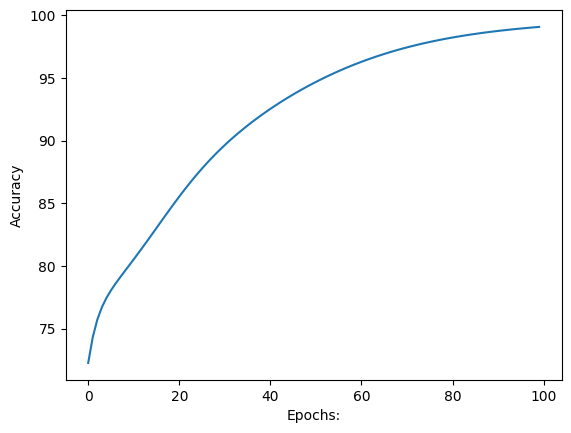

In [118]:
import matplotlib.pyplot as plt1

# plotting accuracy
plt1.plot(acc)
plt.ylabel("Accuracy")
plt.xlabel("Epochs:")
plt1.show()

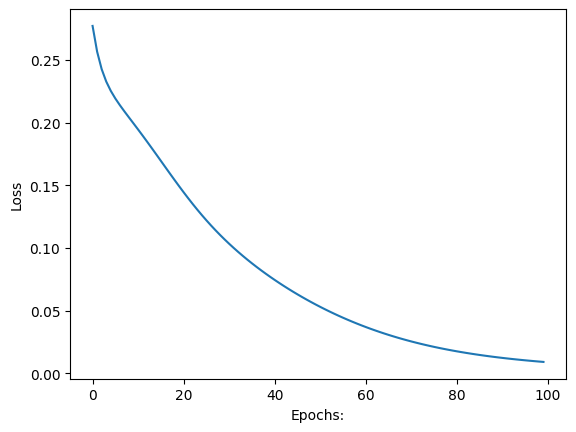

In [119]:
# plot loss
import matplotlib.pyplot as plt1

# plotting accuracy
plt1.plot(losses)
plt.ylabel("Loss")
plt.xlabel("Epochs:")
plt1.show()

In [120]:
print(w1,"\n",w2)


[[-0.04872923  0.00330688 -0.22595742  0.15426245  0.03763696  0.05433337
   0.09010071 -0.01902552 -0.07726143  0.04653188]
 [-0.25706248  0.01069713 -0.14940887  0.37187201 -0.07801771  0.09784153
   0.19096736 -0.47427216  0.06713556 -0.35846387]
 [-0.39839502 -0.01733768 -0.10369097 -0.17393218  0.14727028  0.29529121
   0.12212216  0.11104012 -0.19421385  0.30367839]
 [-0.09124038 -0.37646449  0.32135883 -0.16082142  0.09062816  0.12305865
  -0.06191326  0.26448546  0.3370703   0.02517477]
 [-0.08118988  0.11610866 -0.34253451  0.17490588  0.23456218  0.20507908
  -0.12899085 -0.22310779  0.01989634 -0.33625978]
 [ 0.00490297  0.27999563  0.29892282  0.04613048 -0.03036044 -0.11527072
   0.22103049  0.03038066  0.15309411  0.33891888]
 [ 0.52294494  0.3195461  -0.19343587 -0.02592363  0.35710761  0.10982759
  -0.26488588  0.2277418  -0.24235083 -0.21687274]
 [ 0.28489993  0.26734692  0.0426152  -0.21970788  0.51183217 -0.1537558
  -0.03917919 -0.20036809  0.02941322  0.12174888]
 

Image is of letter A


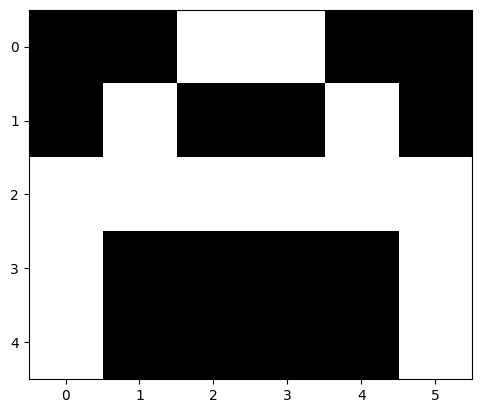

In [121]:
predict(x[0],w1,w2)